In [4]:
import pandas as pd
data = pd.read_csv('Mall_Customers.csv')

In [5]:
data.shape

(200, 5)

In [7]:
X = data.iloc[:,[3,4]]

In [9]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [11]:
from sklearn.cluster import KMeans

In [13]:
km = KMeans(n_clusters=3)

In [14]:
km.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [15]:
km.inertia_

106348.37306211118

In [18]:
sse=[]
for k in range (1,11):
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X)
    sse.append(km.inertia_)

In [19]:
sse

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37265.86520484347,
 30273.394312070042,
 25043.970949607217,
 21806.812998695455,
 19672.07284901432]

In [21]:
import matplotlib.pyplot as plt

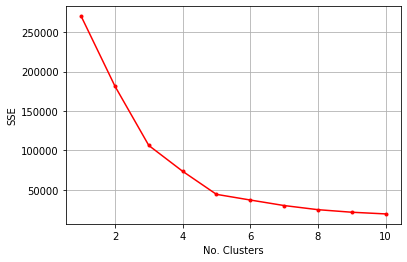

In [25]:
plt.xlabel('No. Clusters')
plt.ylabel('SSE')
plt.grid()
plt.plot(range(1,11),sse,color='red', marker= '.')

In [34]:
from sklearn.metrics import silhouette_score
silh=[]
for k in range(2,11):
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X)
    silh.append(silhouette_score(X,labels))
    

In [30]:
silh

[0.4494755585987857,
 0.4407281203959749,
 0.45310125985052596,
 0.4494755585987857,
 0.4489212857626097,
 0.4437932152235086,
 0.45056557470336733,
 0.4416208208785718,
 0.449795408266166]

<BarContainer object of 9 artists>

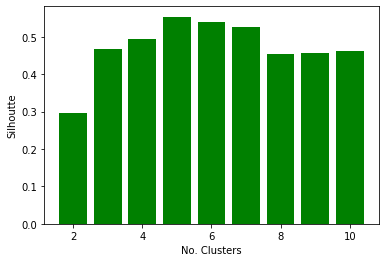

In [36]:
plt.xlabel('No. Clusters')
plt.ylabel('Silhoutte')
plt.bar(range(2,11),silh,color = 'green')
#plt.plot(range(1,11),sse,color='red', marker= '.')

In [38]:
silh.index(max(silh))+2

5

In [40]:
km= KMeans(n_clusters=5)

In [41]:
labels = km.fit_predict(X)

In [42]:
len(labels)

200

In [44]:
len(X[labels==3])

39

In [45]:
len(X[labels==1])

35

In [46]:
len(X[labels==0])

81

In [47]:
len(X[labels==2])

22

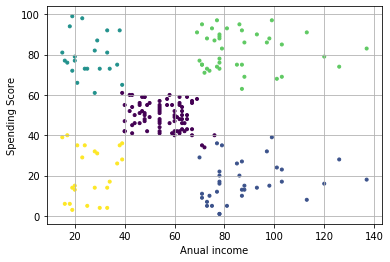

In [50]:
plt.xlabel('Anual income')
plt.ylabel('Spending Score')
plt.grid()
plt.scatter(X.iloc[:,0],X.iloc[:,1], marker= '.',c=labels)